# Exercise set 7: Spatial data

In this exercise set you will be working with structuring and plotting spatial data. 
- Exercise 9.1: basic shapes
- Exercise 9.2: working with Geopandas and interpolation
- Exercise 9.3: interactive plotting with folium

We begin with loading the standard packages:


In [1]:
import os
import requests

import numpy as np
import pandas as pd
import seaborn as sns

import folium
import geopandas as gpd
import fiona
import shapely

%matplotlib inline

## Exercises

### Part 9.1: Working with spatial objects 

This exercise will serve as a brief tutorial on spatial data. We will learn how to make spatial shape and use their basic operations.

> **Ex. 9.1.1** Make a polygon which is square that has left,lower corner in 2,2 and right,upper in 5,5. Make a triangle passing through (0,0), (4,0) and (2,4). What do they look like? Store the two polygons respectively as `square` and `triangle`

> *Hint*: the submodule shapely.geometry has methods such as `Point`, `Polygon` and `Multipolygon`

In [2]:
from shapely.geometry import Polygon

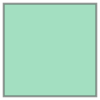

In [3]:
# [Your answer here]
line_coords = np.array([(2,2),(5,2),(5,5),(2,5)])
square = Polygon(line_coords)
square

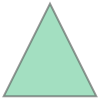

In [4]:
line_coords = np.array([(0,0),(4,0),(2,4)])
triangle = Polygon(line_coords)
triangle

> **Ex. 6.1.2** Compute and show the spatial difference of square subtracted triangle, also show the hat is the union of `square` and `triangle`?

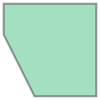

In [5]:
# [Your answer here]
square - triangle

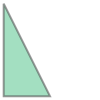

In [6]:
square & triangle

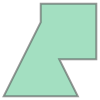

In [7]:
square | triangle

> **Ex. 6.1.3** Make a GeoSeries out of `square`, `triangle`. Plot the geoseries.

In [8]:
# [Your answer here]
geo_series = gpd.GeoSeries([Polygon(np.array([(2,2),(5,2),(5,5),(2,5)])), Polygon(np.array([(0,0),(4,0),(2,4)]))])
geo_series

0    POLYGON ((2 2, 5 2, 5 5, 2 5, 2 2))
1         POLYGON ((0 0, 4 0, 2 4, 0 0))
dtype: geometry

### Part 9.2: Working with house sale prices

Data on danish municipalities are available [here](https://raw.githubusercontent.com/ok-dk/dagi/master/geojson/kommuner.geojson) from Open Knowledge Denmark.

#### Basic operations with Geopandas

> **Ex. 9.2.1** Load the municipalities data using `gpd.read_file()`, 
- What is the CRS of the dataframe - what projection does it correspond to? Turn the CRS into a meter based system.
- Which three munipalities have the largest area?

> Note: to find the entire area of a municipality which consists of multiple shapes (e.g. municipalities covering islands). you can use the `unary_union` method for GeoSeries.

In [9]:
url = "https://raw.githubusercontent.com/ok-dk/dagi/master/geojson/kommuner.geojson"

In [133]:
# [Your answer here]
data = gpd.read_file(url)
data.head(150)

,KOMKODE,KOMNAVN,geometry
0,0766,Hedensted,POLYGON Z ((9.449194065548566 55.8604639390645...
1,0766,Hedensted,POLYGON Z ((10.06197565853068 55.8330104553977...
2,0561,Esbjerg,POLYGON Z ((8.596557253017281 55.5350608554158...
3,0849,Jammerbugt,POLYGON Z ((9.783138987095157 57.0731854421299...
4,0849,Jammerbugt,POLYGON Z ((9.197383819494307 57.1386837082323...
5,0849,Jammerbugt,POLYGON Z ((9.145513887805759 57.0322836096342...
6,0849,Jammerbugt,POLYGON Z ((9.492850534576352 57.0300718413861...
7,0665,Lemvig,POLYGON Z ((8.119410905238921 56.5423454761126...
8,0665,Lemvig,POLYGON Z ((8.134425897257707 56.3844915287983...
9,0540,Sønderborg,POLYGON Z ((9.567708040644659 54.952651378235 ...


In [11]:
data.crs

{'init': 'epsg:4326'}

The data has the GPS (Global positioning system) as CRS system. I want to transform it to the Dansih CRS, which called UTM Zone 32 North and uses euclidian distance measure, 
which measures the distance in meters. It has the EPSG code 25832. 

In [115]:
# from pyproj import CRS


In [114]:
# data.to_crs(epsg=25832)

In [18]:
data.crs

{'init': 'epsg:4326'}

In [146]:
geo_union = []
kommune_list = ['Nordfyns', 'Lejre', 'Tårnby', 'Randers', 'Læsø', 'Ringkøbing-Skjern', 'Hedensted', 'Jammerbugt', 'Esbjerg',
                'Lemvig', 'Næstved', 'Lyngby-Taarbæk', 'Odense', 'Fanø', 'Vejle', 'Ishøj', 'Gentofte', 'Allerød', 'Sorø',
               'Slagelse', 'Rebild', 'Greve', 'Vejen', 'Ikast-Brande', 'Holbæk', 'Ishøj', 'Rødovre', 'Langeland', 'Ringsted',
               'Vallensbæk', 'Christiansø', 'Gladsaxe', 'Halsnæs', 'Sønderborg', 'Lolland', 'Guldborgsund', 'Morsø', 
               'Skanderborg', 'Assens', 'Dragør', 'Frederikshavn', 'Fredericia', 'Odder', 'Køge', 'Mariagerfjord',
               'Samsø', 'Helsingør', 'Albertslund', 'Tønder', 'Norddjurs', 'Nyborg', 'København', 'Frederiksberg', 'Kolding']
for i in kommune_list:
    crit = data['KOMNAVN'] == i
    geo_i = data['geometry'][crit]
    union_i = shapely.ops.unary_union(geo_i)
    geo_union.append(union_i)
geo_union

d = {'geometry': geo_union,'Kommune': kommune_list}
Kommune_samlet = gpd.GeoDataFrame(d)
Kommune_samlet.head()

,geometry,Kommune
0,(POLYGON Z ((10.49144235364623 55.527851316643...,Nordfyns
1,(POLYGON Z ((11.8702732052054 55.7337132507243...,Lejre
2,(POLYGON Z ((12.59231568784286 55.637965351879...,Tårnby
3,(POLYGON Z ((10.21437188360953 56.473978051576...,Randers
4,(POLYGON Z ((10.96120401716674 57.209235076295...,Læsø


In [179]:
geo_union = []

for i in data['KOMNAVN'].iteritems():
    crit = data['KOMNAVN'] == i
    geo_i = data['geometry'][crit]
    union_i = shapely.ops.unary_union(geo_i)
    geo_union.append(union_i)
geo_union

# d = {'geometry': geo_union,'Kommune': kommune_list}
# Kommune_samlet = gpd.GeoDataFrame(d)
# Kommune_samlet.head()
len(geo_union)
data['geo_union'] = geo_union
data.head()

,KOMKODE,KOMNAVN,geometry,geo_union
0,0766,Hedensted,POLYGON Z ((9.449194065548566 55.8604639390645...,()
1,0766,Hedensted,POLYGON Z ((10.06197565853068 55.8330104553977...,()
2,0561,Esbjerg,POLYGON Z ((8.596557253017281 55.5350608554158...,()
3,0849,Jammerbugt,POLYGON Z ((9.783138987095157 57.0731854421299...,()
4,0849,Jammerbugt,POLYGON Z ((9.197383819494307 57.1386837082323...,()


In [147]:
Area = Kommune_samlet.area
# Area

In [148]:
# I know this is not the easiest way to do it, and I haven't included all municiplaities.
# But among the municipalities I have included, Ringkøbing-Skjern, Tønder and Vejle are the municipalities with the biggest
# areas. 
Kommune_samlet['Area']=Area
Kommune_samlet.head()
Kommune_samlet.sort_values(by = 'Area', ascending = False)

,geometry,Kommune,Area
5,(POLYGON Z ((8.290658247660481 56.008037483920...,Ringkøbing-Skjern,0.215362
48,(POLYGON Z ((8.484500865981319 55.064074291652...,Tønder,0.166299
14,POLYGON Z ((9.117144530335919 55.7666853002216...,Vejle,0.151746
7,(POLYGON Z ((9.783138987095157 57.073185442129...,Jammerbugt,0.128473
35,(POLYGON Z ((11.64229885929019 54.909600069253...,Guldborgsund,0.126168
34,(POLYGON Z ((11.59482963330545 54.647395239874...,Lolland,0.124745
22,POLYGON Z ((8.861871414992617 55.4713366091616...,Vejen,0.115680
3,(POLYGON Z ((10.21437188360953 56.473978051576...,Randers,0.109148
8,POLYGON Z ((8.596557253017281 55.5350608554158...,Esbjerg,0.107832
44,(POLYGON Z ((10.2748899173071 56.7103406119954...,Mariagerfjord,0.106136


In [149]:
kommuner = data

Use the script below to add regional information for municipalities. This code block assumes that your geodataframe is names `kommuner`.

In [20]:
kommuner.columns = kommuner.columns.str.lower()
    
# information for municipality
kommune_info = pd.read_json('https://dawa.aws.dk/kommuner')\
                .pipe(lambda df: \
                        df.assign(komkode=df.kode.astype(str).str.zfill(4)))\
                .loc[:,['komkode','regionskode']]\
                

region_info = pd.read_json('https://dawa.aws.dk/regioner/')\
                .loc[:,['kode','navn']]\
                .add_prefix('regions')

kommuner = kommuner\
                .merge(kommune_info,how='left')\
                .merge(region_info,how='left')

> **Ex. 9.2.2** Make two boolean series as follows. 
> - first: row is True if corresponding the row shape is in the Capital Region or Sealand Region (i.e. `'Region Hovedstaden', 'Region Sjælland'`) 
> - second: row is True if the  the row geometry is ***not*** in Bornholm or nearby (i.e. `'Bornholm', 'Christiansø'`)

> Finally make a combined series which takes the value True if both holds, otherwise False and use this series to create a new geodataframe containing only mainland Sealand. 


> *Hint*: recall that we can check if a series elements are elements in a series using the `isin` method


In [22]:
# [Your answer here]
kommuner.head()

,komkode,komnavn,geometry,regionskode,regionsnavn
0,0766,Hedensted,POLYGON Z ((9.449194065548566 55.8604639390645...,1082,Region Midtjylland
1,0766,Hedensted,POLYGON Z ((10.06197565853068 55.8330104553977...,1082,Region Midtjylland
2,0561,Esbjerg,POLYGON Z ((8.596557253017281 55.5350608554158...,1083,Region Syddanmark
3,0849,Jammerbugt,POLYGON Z ((9.783138987095157 57.0731854421299...,1081,Region Nordjylland
4,0849,Jammerbugt,POLYGON Z ((9.197383819494307 57.1386837082323...,1081,Region Nordjylland


In [54]:
criteria = (kommuner['regionsnavn'] == 'Region Hovedstaden') | (kommuner['regionsnavn'] == 'Region Sjælland')
criteria1 = (kommuner['komnavn'] != 'Bornholm') & (kommuner['komnavn'] != 'Christiansø')
criteria2 = criteria & criteria1
Sjealland = kommuner[criteria2]
Sjealland.head()

,komkode,komnavn,geometry,regionskode,regionsnavn
12,0159,Gladsaxe,POLYGON Z ((12.45122969661479 55.7312497302255...,1084,Region Hovedstaden
16,0260,Halsnæs,POLYGON Z ((11.97641998419513 55.9668150173347...,1084,Region Hovedstaden
17,0260,Halsnæs,POLYGON Z ((11.69650853341178 56.1975418785451...,1084,Region Hovedstaden
18,0187,Vallensbæk,POLYGON Z ((12.39143810630769 55.6132173082360...,1084,Region Hovedstaden
19,0187,Vallensbæk,POLYGON Z ((12.40449193760172 55.6140958985082...,1084,Region Hovedstaden


> **Ex. 9.2.3** Explain what is the CRS of the GeoDataFrame. How is distance measured using this coordinate system. Extract the extremum values (min,max) in all dimensions of the sealand geodataframe. That is identify the coordinates of the corners in the smallest square covering the entire island.

> *Hint*: extreme values, i.e. bounds, can be found using `.bounds` on a GeoDataFrame (also works on shapes, GeoSeries)

In [151]:
# [Your answer here]
# The CRS is the type of coordinate reference system used by the GeoSeries to place the objects in space.
# If I could change the CRS in the preveous question, the CRS would measure distance in meters.

Sjealland.bounds.head()

,minx,miny,maxx,maxy
12,12.416180,55.716817,12.521479,55.776722
16,11.843419,55.878697,12.127891,56.031035
17,11.694346,56.192842,11.715766,56.199920
18,12.341336,55.611094,12.403875,55.656214
19,12.400324,55.611263,12.404914,55.614096


#### Interpolation of house prices


In the following two exercises we aim to compute local spatial neighborhood measures of house prices in Sealand and around. We do this by making make a grid of Sealand houseprice data and using a neighborregressor to fill in data in squares that dont have any house sales. Thus the exercise will illustrate how to make a interpolation of data which is useful for feature engineering and get a good understanding of the data.

> **Ex. 9.2.4** Construct a 500mx500m grid for Sealand:
>- Make a grid of points 500m apart in horizontal and vertical directions that are within the extremum values of Sealand's shape. Each pair $(e,n)$ in this grid should be the coordinates of the lower left corner in a 500x500 square.
>- For each of these points construct a square polygon assuming that the point is the south west corner of the square. Do this using `cell_coords_to_polygons`.
>- Use `gpd.sjoin` to take the intersection of the municipalities in sealand and the square grid you have constructed. Plot the resulting geodataframe.
>
> *Hint 1:* Once you have created the grid the following function below may be useful for converting into a GeoDataFrame. You need to specify the column names for your x and y coordinates.
>
> *Hint 2:* We can select the points that intersect by using a spatial join between the house locations and municipalities.

In [40]:
dk_crs = {'ellps': 'GRS80', 'no_defs': True, 'proj': 'utm', 'units': 'm', 'zone': 32}

def cell_coords_to_polygons(square_df, x='e', y='n', dist=500, crs=dk_crs):
    '''
    Convert coordinates to squares in a GeoDataFrame.
       
    Parameters
    ----------
    x : str
        Name of the horizontal coordinate (~longitude)            
    y : str
        Name of the vertical coordinate (~latitude)                        
    dist : int or float
        Size of polygons
    crs : dict
        Coordinate Reference System


    Returns
    ----------
    squares_gdf: geopandas.GeoDataFrame
        This table contains squares as geometry
        and the original data.
    '''
    
    def _to_square_polygon(row):
        '''
        This auxiliary function convert a square's lower,left 
        coordinates to a polygon. 
        
        Parameters
        ----------
        row : pandas.Series
            This is a DataFrame row.            
        
        Returns
        ----------
        poly: shapely.Polygon        
        
        '''
        
        square_coords = ((row[x], row[y]), 
                         (row[x]+dist, row[y]), 
                         (row[x]+dist, row[y]+dist), 
                         (row[x], row[y]+dist))
        
        poly = shapely.geometry.Polygon(square_coords)
        
        return poly
    
    # convert to polygons
    square_geoms = gpd.GeoSeries(square_df.apply(_to_square_polygon, axis=1), crs=crs)
    
    # make GeoDataFrame
    square_gdf = gpd.GeoDataFrame(data=square_df, geometry=square_geoms)
    
    return square_gdf

In [182]:
# [Your answer here]
# I could not answer this question as I did not succeed in calculating the distance in meters. 

> **Ex. 9.2.5**  Load the pre-structured data with house sales prices for Sealand. These data are available on Absalon as a .GeoJSON file. Construct a loop that for each year in the `sale_year` column 
> - extracts the house sales sold in this year, with a square meter price (`price_area`) between between 1000 and 120000. 
> - Selects the four columns `['sale_year', 'e', 'n', 'price_area']` and drops any rows with missing data. 
> - After preparing the data fit a `KNeighborsRegressor` with the coordinate columns `e` and `n` as features and the square-meter price as labels.
> - Computes predictions `preds` where `e`, `n` are taken from the square grid geodataframe you constructed above. Add 250 to each value to predict at the midpoint of the square!
> - creates a new column `p_{year}` in the square-grid geodataframe, containing `np.log10(preds)`
>
> Plot the grid data, coloring the grids by their predicted square meter price in 2012.

In [153]:
from sklearn.neighbors import KNeighborsRegressor
price_gdf = gpd.read_file('houseprices.GeoJSON')

In [164]:
# [Your answer here]
price_gdf.head()
for i in price_gdf['sale_year'].iteritems():
    price_criteria = (1000 <  price_gdf['price_area']) & ( price_gdf['price_area'] < 120000)
    price_gdf = price_gdf[['sale_year', 'e', 'n', 'price_area']][price_criteria]
    price_gdf = price_gdf.dropna()
price_gdf.head()

,sale_year,e,n,price_area
0,2012,710214.000597,6.174689e+06,13163.265306
1,2012,710214.000597,6.174689e+06,11734.693878
2,2012,711069.000619,6.174742e+06,12938.931298
3,2012,711223.000623,6.174812e+06,15229.007634
4,2012,711223.000623,6.174812e+06,13702.290076


In [181]:
y = price_gdf['price_area']
X = price_gdf[['e','n']]
KNR = KNeighborsRegressor()
KNR.fit(X,y)
preds = KNR.predict(X)
# square_grid['p_{year}'] = np.log10(preds)
# I could not finish this question as I did not succed in calculating the distance in meters.